<a href="https://colab.research.google.com/github/barbarajunq131/Programas/blob/main/exercicio_3_atrasado__desenvolvimento_regional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Disciplina :  CEA0004 - Desenvolvimento Regional - T01 (2025.2) /n

Aluna: Bárbara Junqueira dos Santos /n

Matricula: 20252001826 /n

Lista de exercício: 03/n

link do colab: https://colab.research.google.com/drive/1uAEAi1xhBxP2-DjzaZ8kOV3vmvr0MlvS#scrollTo=PQXmsPBUL6z9

ATIVIDADE 3:
Aplicação da Lei de Zipf à rede de cidades de um estado brasileiro


1. Escolher um Estado da federação.

2. Coletar dados da população dos municípios do Estado.

Fonte sugerida: www.ipeadata.gov.br

- Caminho: REGIONAL>Nível geográfico>Municípios>Temas>População.

- Marcar “População Residente Total”;

- Em “Escolha a abrangência”, escolher o estado de interesse;

- Exportar planilha Excel nas opções no alto à direita;

- Escolher o ano mais recente.

3. De posse dos dados, ordenar a população dos municípios em ordem decrescente (do maior para o menor). Dica: Na aba “Dados”, use o comando “Classificar”.

4. Criar mais uma coluna com o ranking: 1, 2, 3...

5. No Excel, fazer um gráfico de dispersão (xy) em que x = posição no ranking (1, 2, 3, ...) e y = população dos municípios.

6. Linearizar, fazendo log(x) e log(y); refazer o gráfico de dispersão. (*)

7. Fazer um ajustamento linear simples, ilustrando no gráfico.

- Clique com o botão direito sobre uma observação no gráfico e aparecerá a opção “adicionar linha de tendência”;

- Na caixa que se abrirá, marcar as opções “Exibir equação no gráfico” e “Exibir valor de R-quadrado no gráfico”.

8. Observar e interpretar, segundo a Lei de Zipf, o valor do parâmetro q (coeficiente de inclinação) e do coeficiente R2.

________________________

(*) A equação   pode ser linearizada fazendo-se Log(Pr)=log(P1) – qLog(r).


### 1. Instalar pacotes necessários



In [126]:
!pip install pandas matplotlib numpy requests openpyxl --quiet

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2. Coletar dados de população municipal no IPEA
### Série: População residente total (IPEA) - Estado de São Paulo - 2022


In [128]:
caminho = "/content/ipeadata[30-10-2025-10-02].csv"
df = pd.read_csv(url, sep=';', encoding='latin1')

In [129]:
df = pd.read_csv(caminho, sep=';', encoding='latin1', skiprows=1)


In [130]:
print("Colunas originais:", df.columns.tolist())
df.head()

Colunas originais: ['Sigla', 'CÃ³digo', 'MunicÃ\xadpio', '2022', 'Unnamed: 4']


,Sigla,CÃ³digo,MunicÃ­pio,2022,Unnamed: 4
0,SP,3500105,Adamantina,34687.0,NaN
1,SP,3500204,Adolfo,4351.0,NaN
2,SP,3500303,AguaÃ­,32072.0,NaN
3,SP,3500402,Ãguas da Prata,7369.0,NaN
4,SP,3500501,Ãguas de LindÃ³ia,17930.0,NaN


### 3.Renomear colunas


In [131]:
df = df.rename(columns={
    'Sigla': 'UF',
    'CÃ³digo': 'Codigo',
    'MunicÃ\xadpio': 'Municipio',
    '2022': 'Populacao'
})
print("\n2. PRIMEIRAS 5 LINHAS DO DATAFRAME:")
print("-" * 40)
print(df.head())


2. PRIMEIRAS 5 LINHAS DO DATAFRAME:
----------------------------------------
   UF   Codigo           Municipio  Populacao  Unnamed: 4
0  SP  3500105          Adamantina    34687.0         NaN
1  SP  3500204              Adolfo     4351.0         NaN
2  SP  3500303              AguaÃ­    32072.0         NaN
3  SP  3500402     Ãguas da Prata     7369.0         NaN
4  SP  3500501  Ãguas de LindÃ³ia    17930.0         NaN


### 4. Limpar e converter dados

In [132]:
df['Populacao'] = pd.to_numeric(df['Populacao'], errors='coerce')
df = df.dropna(subset=['Populacao'])

### 5. Ordenar e criar ranking


In [133]:
df = df.sort_values(by='Populacao', ascending=False)
df['Ranking'] = np.arange(1, len(df) + 1)
df.head(10)


,UF,Codigo,Municipio,Populacao,Unnamed: 4,Ranking
562,SP,3550308,SÃ£o Paulo,11451999.0,NaN,1
212,SP,3518800,Guarulhos,1291771.0,NaN,2
108,SP,3509502,Campinas,1139047.0,NaN,3
544,SP,3548708,SÃ£o Bernardo do Campo,810729.0,NaN,4
534,SP,3547809,Santo AndrÃ©,748919.0,NaN,5
387,SP,3534401,Osasco,728615.0,NaN,6
581,SP,3552205,Sorocaba,723682.0,NaN,7
487,SP,3543402,RibeirÃ£o Preto,698642.0,NaN,8
557,SP,3549904,SÃ£o JosÃ© dos Campos,697054.0,NaN,9
556,SP,3549805,SÃ£o JosÃ© do Rio Preto,480393.0,NaN,10


### Visualização dos 10 últimos municipios

In [134]:
df.tail(10)

,UF,Codigo,Municipio,Populacao,Unnamed: 4,Ranking
527,SP,3547205,Santana da Ponte Pensa,1670.0,NaN,636
619,SP,3555307,Turmalina,1669.0,NaN,637
179,SP,3515657,FernÃ£o,1656.0,NaN,638
532,SP,3547650,Santa Salete,1645.0,NaN,639
153,SP,3513850,Dirce Reis,1620.0,NaN,640
624,SP,3555703,UniÃ£o Paulista,1603.0,NaN,641
181,SP,3515806,Flora Rica,1487.0,NaN,642
626,SP,3555901,Uru,1387.0,NaN,643
370,SP,3532868,Nova Castilho,1062.0,NaN,644
81,SP,3507209,BorÃ¡,907.0,NaN,645


### 5. Gráfico População x Ranking


GRÁFICO 1: POPULAÇÃO x RANKING


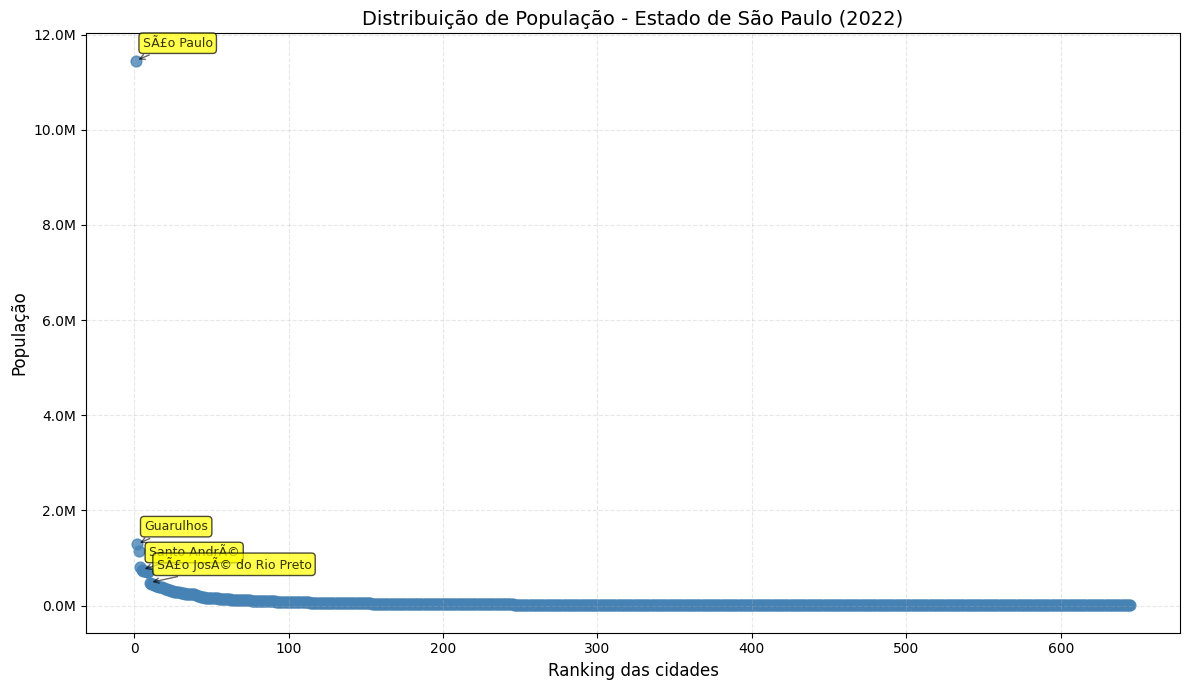

In [135]:
# GRÁFICO 1: População x Ranking (conforme item 5 do documento)
print("\n" + "=" * 60)
print("GRÁFICO 1: POPULAÇÃO x RANKING")
print("=" * 60)

import matplotlib.ticker as ticker

plt.figure(figsize=(12, 7))
plt.scatter(df['Ranking'], df['Populacao'], color='steelblue', alpha=0.8, s=60)

# Configurar eixos e título
plt.ylabel("População", fontsize=12)
plt.xlabel("Ranking das cidades", fontsize=12)
plt.title("Distribuição de População - Estado de São Paulo (2022)", fontsize=14)

# Formatar eixo Y em milhões
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1_000_000:,.1f}M'))

# Adicionar grade
plt.grid(True, alpha=0.3, linestyle='--')

# Destacar algumas cidades importantes (opcional)
cidades_destaque = [0, 1, 4,9]
for idx in cidades_destaque:
    if idx < len(df):
        cidade = df.iloc[idx]
        plt.annotate(cidade['Municipio'],
                    xy=(cidade['Ranking'], cidade['Populacao']),
                    xytext=(5, 10), textcoords='offset points',
                    fontsize=9, alpha=0.8,
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7),
                    arrowprops=dict(arrowstyle='->', alpha=0.6))

plt.tight_layout()
plt.show()

### 6.Gráfico log-log (Lei de Zipf)


GRÁFICO 2: GRÁFICO LOG-LOG (LEI DE ZIPF)


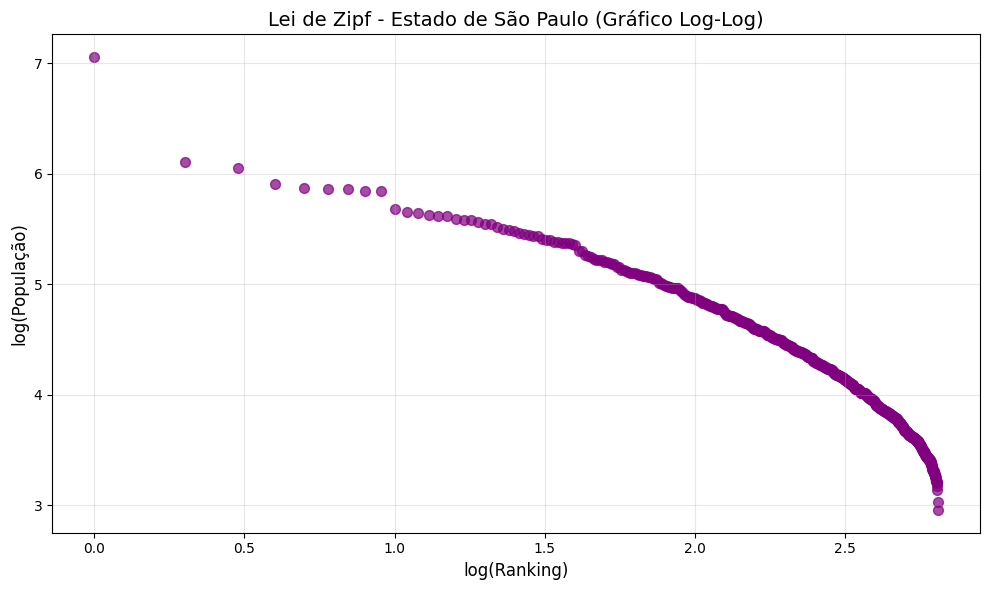

In [136]:
print("\n" + "=" * 60)
print("GRÁFICO 2: GRÁFICO LOG-LOG (LEI DE ZIPF)")
print("=" * 60)

# Calcular logs se ainda não existirem
if 'log_ranking' not in df.columns:
    df['log_ranking'] = np.log10(df['Ranking'])
if 'log_pop' not in df.columns:
    df['log_pop'] = np.log10(df['Populacao'])

plt.figure(figsize=(10, 6))
plt.scatter(df['log_ranking'], df['log_pop'], color='purple', alpha=0.7, s=50)
plt.xlabel('log(Ranking)', fontsize=12)
plt.ylabel('log(População)', fontsize=12)
plt.title("Lei de Zipf - Estado de São Paulo (Gráfico Log-Log)", fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### 7.Ajuste linear (Lei de Zipf)


GRÁFICO 3: AJUSTE LINEAR DA LEI DE ZIPF


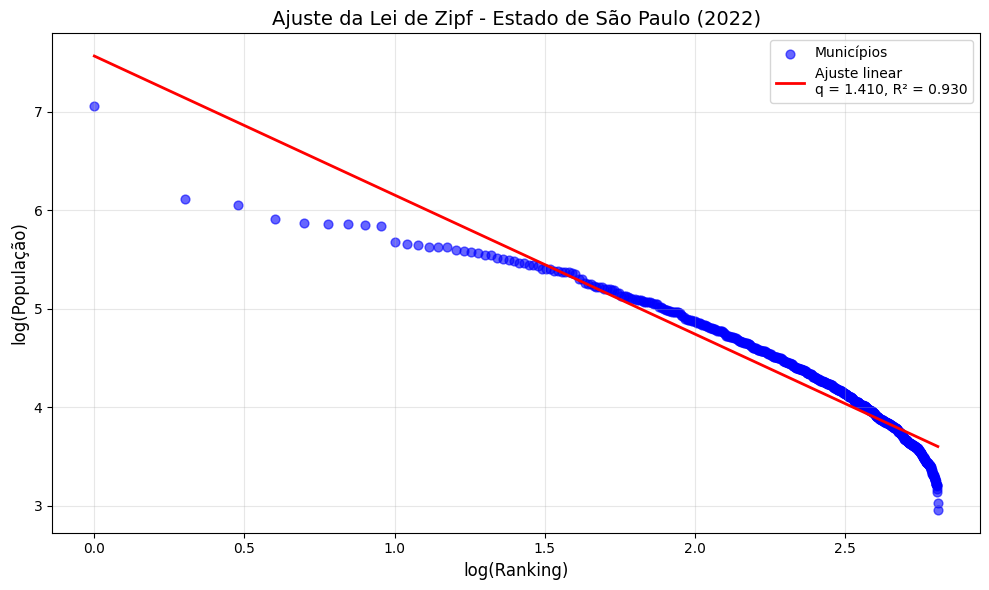

In [137]:
print("\n" + "=" * 60)
print("GRÁFICO 3: AJUSTE LINEAR DA LEI DE ZIPF")
print("=" * 60)

# Ajuste linear
coef = np.polyfit(df['log_ranking'], df['log_pop'], 1)
q = -coef[0]  # coeficiente da Lei de Zipf
pred = np.polyval(coef, df['log_ranking'])

# Calcular R²
r2 = 1 - np.sum((df['log_pop'] - pred)**2) / np.sum((df['log_pop'] - np.mean(df['log_pop']))**2)

plt.figure(figsize=(10, 6))
plt.scatter(df['log_ranking'], df['log_pop'], color='blue', alpha=0.6, s=40, label="Municípios")
plt.plot(df['log_ranking'], pred, color='red', linewidth=2,
         label=f"Ajuste linear\nq = {q:.3f}, R² = {r2:.3f}")
plt.xlabel("log(Ranking)", fontsize=12)
plt.ylabel("log(População)", fontsize=12)
plt.title("Ajuste da Lei de Zipf - Estado de São Paulo (2022)", fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [138]:
# Estatísticas adicionais do ranking
print("\n9. ESTATÍSTICAS DO RANKING:")
print("-" * 30)
print(f"Maior população: {df['Populacao'].max():,} hab. ({df.iloc[0]['Municipio']})")
print(f"Menor população: {df['Populacao'].min():,} hab. ({df.iloc[-1]['Municipio']})")
print(f"Razão maior/menor: {df['Populacao'].max()/df['Populacao'].min():,.0f} vezes")
print(f"População média: {df['Populacao'].mean():,.0f} hab.")
print(f"Mediana da população: {df['Populacao'].median():,.0f} hab.")


9. ESTATÍSTICAS DO RANKING:
------------------------------
Maior população: 11,451,999.0 hab. (SÃ£o Paulo)
Menor população: 907.0 hab. (BorÃ¡)
Razão maior/menor: 12,626 vezes
População média: 68,855 hab.
Mediana da população: 13,163 hab.


### 10. Resultados finais

In [139]:
print("\n" + "=" * 60)
print("RESULTADOS FINAIS")
print("=" * 60)

print(f"\nCoeficiente de inclinação (q): {q:.3f}")
print(f"Coeficiente de determinação (R²): {r2:.3f}")

# Interpretação dos resultados
print("\nINTERPRETAÇÃO:")
print("-" * 15)
if q > 0.9 and q < 1.1:
    print("• O valor de q ≈ 1.0 indica que a distribuição segue a Lei de Zipf 'pura'")
elif q > 1.1:
    print("• O valor de q > 1.1 indica alta concentração populacional nas maiores cidades")
else:
    print("• O valor de q < 0.9 indica distribuição mais equilibrada entre as cidades")

if r2 > 0.9:
    print("• R² > 0.9 indica excelente ajuste aos dados da Lei de Zipf")
elif r2 > 0.8:
    print("• R² > 0.8 indica bom ajuste aos dados da Lei de Zipf")
else:
    print("• R² baixo sugere que a Lei de Zipf não explica bem a distribuição")

print(f"\nTotal de municípios analisados: {len(df)}")
print(f"Ano de referência: 2022")
print(f"Estado: São Paulo")


RESULTADOS FINAIS

Coeficiente de inclinação (q): 1.410
Coeficiente de determinação (R²): 0.930

INTERPRETAÇÃO:
---------------
• O valor de q > 1.1 indica alta concentração populacional nas maiores cidades
• R² > 0.9 indica excelente ajuste aos dados da Lei de Zipf

Total de municípios analisados: 645
Ano de referência: 2022
Estado: São Paulo


### O coeficiente de Zipf q = 1,410 indica uma forte concentração populacional nas maiores cidades do Estado de São Paulo, superior ao valor teórico de 1,0 previsto pela Lei de Zipf "pura". Isso significa que a cidade de São Paulo exerce um papel de primazia urbana ainda mais acentuada, onde as cidades subsequentes possuem populações relativamente menores do que o esperado na distribuição ideal. O alto R² = 0,930 confirma que o modelo explica 93% da variabilidade dos dados, demonstrando um excelente ajuste à relação log-linear e validando a aplicabilidade da Lei de Zipf na rede urbana paulista, embora com maior concentração no topo da hierarquia.